**Importing libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

**Importing CSV files**

In [2]:
train_df = pd.read_csv("/content/project_training_data_with_class_labels.csv", error_bad_lines=False)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
train_df 

,ID,Comments,Parent Comments,Class Labels
0,ocxtitan,Central Illinois,Jesus; where do you live?,non-sarcastic
1,LeChuckly,To think - CNN used to be the acronym synonymo...,Even The CNN Staff Is Sick Of The Wall-To-Wall...,non-sarcastic
2,throwitskrub8,But then again; you have to consider that all ...,agree to that part.It can also mean that gujra...,non-sarcastic
3,fresherthanyouuu,ughhhhh,If a guy told you he doesn't use social media ...,non-sarcastic
4,_kushagra,I should've put the,No; it's just a programming bug. After all; th...,sarcastic
...,...,...,...,...
33885,CannotIntoName,Am a Trotskyist; can confirm.,Trotsky *invented* racism!,sarcastic
33886,Sora2K8,I should have bEElieved,Secret prediction still going strong,non-sarcastic
33887,ProWomanAntiFeminist,Well; that's your choice; but I like being abl...,no; no more fear of the law.,non-sarcastic
33888,quigs17,In that Era even now your best players usually...,I knew that Babe Ruth used to be a pitcher. I ...,non-sarcastic


In [4]:
test_df = pd.read_csv("/content/project_test_data.csv", error_bad_lines=False)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
test_df

,ID,Comments,Parent Comments
0,theyoungthaddeus,"No one ""needs"" an assault foam dart blaster",Your son has to register those at the county j...
1,Just_an_asian_here,Cause all attractive women are uninteresting a...,Likely due to creative and interesting content.
2,Foxprowl,Poser.,Jon Stewart is going to HBO
3,kd7rzv,Won't be long and Anet will start banning peop...,This post looks like bullshit market manipulat...
4,Ellefied,There goes my hope that Kubo does a Kojima as ...,Plus the Japanese typically do not talk shit w...
...,...,...,...
41075,RiftRacer,I'll be pushing them hard before that... there...,It took a month for me to get my returns label...
41076,el_mas_gringo,Maybe Lifetime could jump on this...,TIL one in three lesbian women report being se...
41077,Whathefuckiswrong,Lol to be fair to mom he was a damn sexy mailman,Apparently; a lot of you look like the mailman.
41078,aliceunknown,Looks good so me.,Um; yeah....


**Cleaning the dataset**

In [6]:
df1 = train_df[train_df.isna().any(axis=1)]

In [7]:
df1

,ID,Comments,Parent Comments,Class Labels
8917,self_defeating,NaN,Because we have chosen them as sources of mind...,sarcastic
9396,Khvostov_7g-02,NaN,woah; thanks.,non-sarcastic
9469,roybringus,NaN,I am just shocked an upstanding group like thi...,sarcastic
33889,Jingle,NaN,NaN,NaN


In [72]:
df5= train_df.dropna()

In [9]:
df2 = test_df[test_df.isna().any(axis=1)]

In [10]:
df2

,ID,Comments,Parent Comments
6878,viborg,NaN,"That's an odd use of ""great"". :)"
25577,HUNG_LIKE_A_KLINGON,NaN,Very important lead story in the latest QUT Al...
31749,MattHoppe1,NaN,"What is your hometown's ""Claim to Baseball Fam..."
41079,King_Kunta_69,Yeah because those people are r,NaN


In [11]:
test_df.dropna()

,ID,Comments,Parent Comments
0,theyoungthaddeus,"No one ""needs"" an assault foam dart blaster",Your son has to register those at the county j...
1,Just_an_asian_here,Cause all attractive women are uninteresting a...,Likely due to creative and interesting content.
2,Foxprowl,Poser.,Jon Stewart is going to HBO
3,kd7rzv,Won't be long and Anet will start banning peop...,This post looks like bullshit market manipulat...
4,Ellefied,There goes my hope that Kubo does a Kojima as ...,Plus the Japanese typically do not talk shit w...
...,...,...,...
41074,ikt123,Didn't see that coming!,Tasmania votes: Liberals snatch power; ending ...
41075,RiftRacer,I'll be pushing them hard before that... there...,It took a month for me to get my returns label...
41076,el_mas_gringo,Maybe Lifetime could jump on this...,TIL one in three lesbian women report being se...
41077,Whathefuckiswrong,Lol to be fair to mom he was a damn sexy mailman,Apparently; a lot of you look like the mailman.


In [12]:
train_df.rename(columns = {' Class Labels ':'label'}, inplace = True)

In [13]:
train_df['label'].replace(['non-sarcastic','sarcastic'],[1,0], inplace = True)

In [14]:
train_df.head()

,ID,Comments,Parent Comments,label
0,ocxtitan,Central Illinois,Jesus; where do you live?,1.0
1,LeChuckly,To think - CNN used to be the acronym synonymo...,Even The CNN Staff Is Sick Of The Wall-To-Wall...,1.0
2,throwitskrub8,But then again; you have to consider that all ...,agree to that part.It can also mean that gujra...,1.0
3,fresherthanyouuu,ughhhhh,If a guy told you he doesn't use social media ...,1.0
4,_kushagra,I should've put the,No; it's just a programming bug. After all; th...,0.0


In [15]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33890 entries, 0 to 33889
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               33890 non-null  object 
 1   Comments         33886 non-null  object 
 2   Parent Comments  33889 non-null  object 
 3   label            33889 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.0+ MB


In [16]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41080 entries, 0 to 41079
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                41080 non-null  object
 1   Comments          41077 non-null  object
 2   Parent Comments   41079 non-null  object
dtypes: object(3)
memory usage: 962.9+ KB


**Exploratory Data Analysis**

In [17]:
# to check number of sarcastic and non-sarcastic comments
train_df['label'].value_counts()

0.0    16988
1.0    16901
Name: label, dtype: int64

Almost equal number of sarcastic and non-sarcastic comments.

In [18]:
print(train_df['label'].value_counts()/len(train_df))

0.0    0.501269
1.0    0.498702
Name: label, dtype: float64


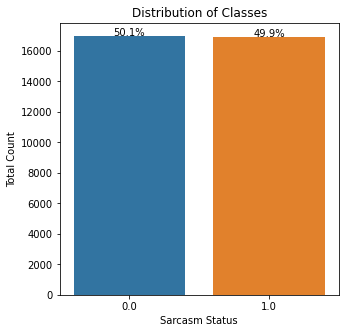

In [19]:
plt.figure(figsize=(5,5))
ax = sns.countplot(x='label',  data= train_df)
ax.set(title = "Distribution of Classes", xlabel="Sarcasm Status", ylabel = "Total Count")
total = float(len(train_df))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.1f}%'.format((height/total)*100),
            ha="center") 
plt.show()

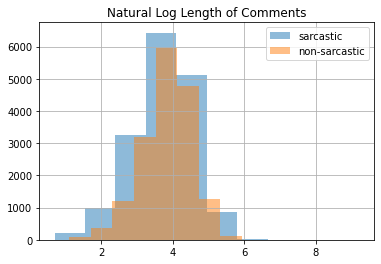

In [20]:
# To check if there is any relation between the length of the comment and its label
#train_df.loc[train_df,'Comments'].str.len().apply(np.log1p).hist(label='sarcastic,alpha=.5)
train_df.loc[train_df['label']==1,'Comments'].str.len().apply(np.log1p).hist(label='sarcastic', alpha=.5)
train_df.loc[train_df['label']==0,'Comments'].str.len().apply(np.log1p).hist(label='non-sarcastic', alpha=.5)
plt.legend()
plt.title('Natural Log Length of Comments')
plt.show()

Sarcastic comments are normally distributed in length. Non-sarcastic comments has a right-skew.

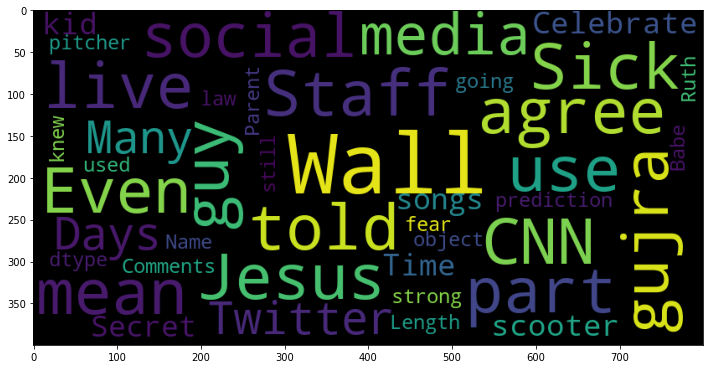

In [21]:
# Most common words in the sarcastic comments 
wordcloud = WordCloud(background_color='black', stopwords = STOPWORDS,
                max_words = 200, max_font_size = 100, 
                random_state = 17, width=800, height=400)

plt.figure(figsize=(12, 12))
wordcloud.generate(str(train_df.loc[train_df['label'] == 1, 'Parent Comments']))
plt.grid(b= False)
plt.imshow(wordcloud);

In [22]:
# Comparing sarcastic comments with Parent comments
sarcasm_comm_len = np.array(train_df.loc[train_df['label'] == 1]['Comments'].str.len())
parent_comm_len = np.array(train_df.loc[train_df['label'] == 1]['Parent Comments'].str.len())
ratio_len = np.array((train_df.loc[train_df['label'] == 1]['Comments'].str.len())/(train_df.loc[train_df['label'] == 1]['Parent Comments'].str.len()))

In [23]:
d = pd.DataFrame({'Comment Length': sarcasm_comm_len, 'Parent Comment Length': parent_comm_len, 'Ratio Length': ratio_len}, columns=['Comment Length', 'Parent Comment Length', 'Ratio Length'])

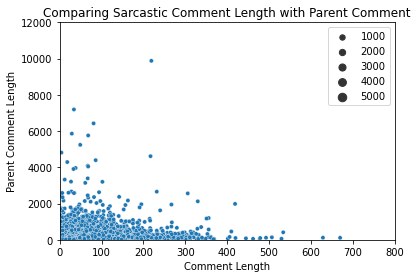

In [24]:
ax = plt.axes()
sns.scatterplot(data=d, x="Comment Length", y="Parent Comment Length",  size=ratio_len)
ax.set_title("Comparing Sarcastic Comment Length with Parent Comment")
# control x and y limits
plt.ylim(0, 12000)
plt.xlim(0, 800)
plt.show()

In [25]:
from nltk.tokenize import word_tokenize, sent_tokenize, wordpunct_tokenize, TreebankWordTokenizer, TweetTokenizer, MWETokenizer
from nltk.corpus import stopwords
from nltk import ngrams
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

In [73]:
corpus = df5['Comments'].values.astype('U')

In [74]:
corpus

array(['Central Illinois',
       'To think - CNN used to be the acronym synonymous with news.',
       "But then again; you have to consider that all husbands suspecting adultery don't or are simply can't afford to go for a paternity test.",
       ..., 'I should have bEElieved',
       "Well; that's your choice; but I like being able to drop the soap in the shower without fear.",
       'In that Era even now your best players usually pitch in lower levels'],
      dtype='<U10000')

Tfidf vectorizer

Stop words removed

In [75]:
"""Tfidf vectorizer

Stop words removed
"""

method="Binary"

from sklearn.feature_extraction.text import CountVectorizer

if method=="Tfidf":
    vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1,1))
elif method=="Binary":
    vectorizer = CountVectorizer(stop_words='english', ngram_range=(1,2), min_df=2)
    
tfidf= TfidfVectorizer(stop_words='english', ngram_range=(1,1))

X = vectorizer.fit_transform(corpus)
np.shape(X)

(33886, 19550)

In [80]:
labels = df5['label'].to_list()

In [76]:
#print(vectorizer.get_feature_names())
X=np.asmatrix(X)
Countvecs=pd.DataFrame(X)

print(Countvecs.head())

                                                   0
0    (0, 2548)\t1\n  (0, 7964)\t1\n  (1, 17054)\t...


In [77]:
bigram_vectorizer = CountVectorizer(ngram_range=(1, 2),token_pattern=r'\b\w+\b', min_df=1).build_analyzer()

In [81]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(corpus, labels , test_size= 0.25, random_state=42)

In [82]:
from os import path
sns.set()
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import calendar
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
%matplotlib inline
import time

In [83]:
parameters = {'solver': [ 'lbfgs', 'liblinear', 'saga'], 'verbose': [0, 1, 2]}

# multinomial logistic regression a.k.a softmax classifier
logit = LogisticRegression(random_state= 42)

logit_classifier = GridSearchCV(logit, parameters, cv = 5, n_jobs= 4)

# sklearn's pipeline
tfidf_logit_pipeline = Pipeline([('vectorizer', vectorizer),  ('logit_classifier', logit_classifier)])

In [84]:
start = time.time()
tfidf_logit_pipeline.fit(x_train, y_train)
end = time.time()
print(end - start) 

17.053278923034668


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


In [85]:
print(logit_classifier.best_params_)
print(logit_classifier.best_score_)

{'solver': 'saga', 'verbose': 0}
0.6312265429679984


In [86]:
valid_pred = tfidf_logit_pipeline.predict(x_test)

In [87]:
accuracy_score(y_test, valid_pred)

0.6364494806421152

In [88]:
# Getting the accuracy metric
acc = accuracy_score(valid_pred, y_test)
pre = precision_score(valid_pred, y_test)
rec = recall_score(valid_pred, y_test)
f1 = f1_score(valid_pred, y_test)

print ('Model Performance Statistic Suite-1: ')
print ('Accuracy: ', acc)
print ('Precision: ', pre)
print ('Recall: ',rec)
print ('F1 Score: ', f1)

cm = confusion_matrix(y_test,valid_pred)

sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[0,1]+cm[1,1])
print('Specificity : ', specificity)

Model Performance Statistic Suite-1: 
Accuracy:  0.6364494806421152
Precision:  0.7050831576481612
Recall:  0.6230594079900642
F1 Score:  0.6615384615384616
Sensitivity :  0.6542158747596815
Specificity :  0.6230594079900642


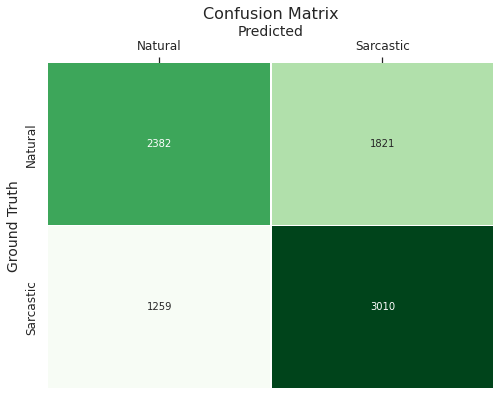

In [89]:
cm =  pd.DataFrame(cm, index=['Natural','Sarcastic'],columns=['Natural','Sarcastic'])
fig = plt.figure(figsize=(8,6))
ax = sns.heatmap(cm,annot=True,cbar=False, cmap='Greens',linewidths=0.5,fmt='.0f')
ax.set_title('Confusion Matrix',fontsize=16,y=1.25)
ax.set_ylabel('Ground Truth',fontsize=14)
ax.set_xlabel('Predicted',fontsize=14)
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.tick_params(labelsize=12)